# User Churn Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.getcwd()

'C:\\Users\\Mahesh\\Downloads\\Hizen AI assignment'

In [2]:
events = pd.read_csv('events.csv')

In [3]:
events.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy
3,2020-09-24 11:57:33 UTC,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08
4,2020-09-24 11:57:36 UTC,view,3658723,2144415921169498184,NaN,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ


In [4]:
events['event_type'].value_counts()

event_type
view        793748
cart         54035
purchase     37346
Name: count, dtype: int64

In [5]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885129 entries, 0 to 885128
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     885129 non-null  object 
 1   event_type     885129 non-null  object 
 2   product_id     885129 non-null  int64  
 3   category_id    885129 non-null  int64  
 4   category_code  648910 non-null  object 
 5   brand          672765 non-null  object 
 6   price          885129 non-null  float64
 7   user_id        885129 non-null  int64  
 8   user_session   884964 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 60.8+ MB


### Data preprocessing

Removing 'UTC' from event_time and converting it to datetime datatype

In [6]:
events['event_time'] = events['event_time'].str.replace(' UTC','',regex=False)

In [7]:
events['event_time'] = pd.to_datetime(events['event_time'])

In [8]:
events['date'] = events['event_time'].dt.date
events['time'] = events['event_time'].dt.time

In [9]:
events.isnull().sum()

event_time            0
event_type            0
product_id            0
category_id           0
category_code    236219
brand            212364
price                 0
user_id               0
user_session        165
date                  0
time                  0
dtype: int64

In [10]:
pd.DataFrame(round((events.isnull().mean() * 100), 2), columns=["Percentage_of_missing_values"])

,Percentage_of_missing_values
event_time,0.00
event_type,0.00
product_id,0.00
category_id,0.00
category_code,26.69
brand,23.99
price,0.00
user_id,0.00
user_session,0.02
date,0.00


In [11]:
events.duplicated().sum()

655

In [12]:
events.drop_duplicates(keep='first',inplace=True)

In [13]:
events.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,date,time
0,2020-09-24 11:57:06,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT,2020-09-24,11:57:06
1,2020-09-24 11:57:26,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY,2020-09-24,11:57:26
2,2020-09-24 11:57:27,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy,2020-09-24,11:57:27
3,2020-09-24 11:57:33,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08,2020-09-24,11:57:33
4,2020-09-24 11:57:36,view,3658723,2144415921169498184,NaN,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ,2020-09-24,11:57:36


In [14]:
events['category_code'].fillna(events['category_code'].mode()[0],inplace=True)

In [15]:
events['brand'].fillna(events['brand'].mode()[0],inplace=True)

In [16]:
events.isnull().sum()

event_time         0
event_type         0
product_id         0
category_id        0
category_code      0
brand              0
price              0
user_id            0
user_session     162
date               0
time               0
dtype: int64

Dropping the remaining rows of missing values as we have only 0.02%.

In [17]:
events.dropna(axis=0,inplace=True)

In [18]:
events.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,date,time
0,2020-09-24 11:57:06,view,1996170,2144415922528452715,electronics.telephone,asus,31.90,1515915625519388267,LJuJVLEjPT,2020-09-24,11:57:06
1,2020-09-24 11:57:26,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY,2020-09-24,11:57:26
2,2020-09-24 11:57:27,view,215454,2144415927158964449,computers.components.videocards,asus,9.81,1515915625513238515,4TMArHtXQy,2020-09-24,11:57:27
3,2020-09-24 11:57:33,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08,2020-09-24,11:57:33
4,2020-09-24 11:57:36,view,3658723,2144415921169498184,computers.components.videocards,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ,2020-09-24,11:57:36


### EDA (Exploratory Data Analysis)

Events type distibution

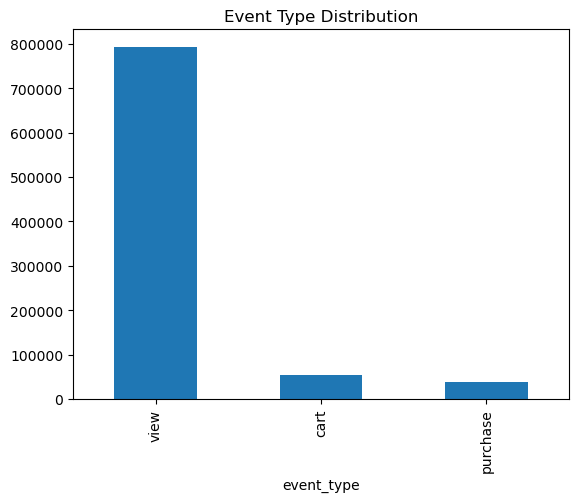

In [19]:
event_counts = events['event_type'].value_counts()
event_counts.plot(kind='bar', title='Event Type Distribution')
plt.show()

Checking for Brand popularity

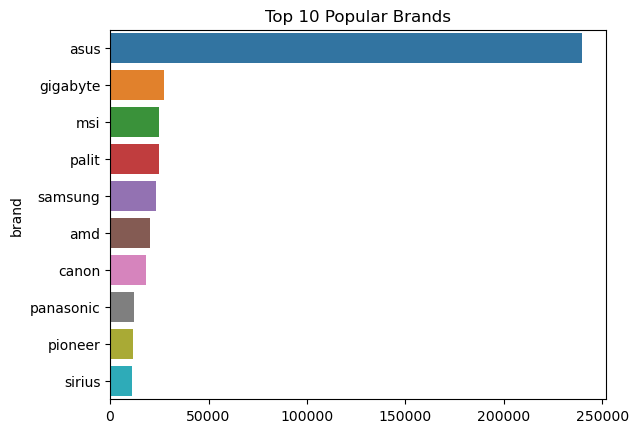

In [20]:
# Top 10 popular brands
popular_brands = events['brand'].value_counts().head(10)
sns.barplot(x=popular_brands.values, y=popular_brands.index)
plt.title('Top 10 Popular Brands')
plt.show()

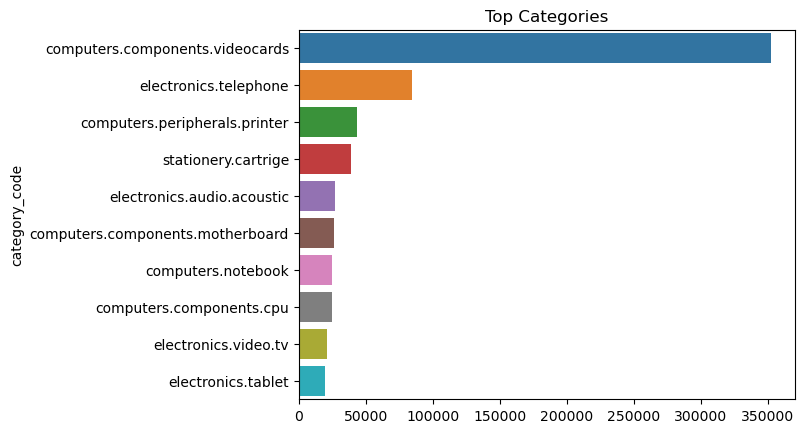

In [21]:
# Top categories
popular_categories = events['category_code'].value_counts().head(10)
sns.barplot(x=popular_categories.values, y=popular_categories.index)
plt.title('Top Categories')
plt.show()

User level summary

In [25]:
# User-level metrics
user_summary = events.groupby('user_id').agg(
    total_spent=('price', 'sum'),
    total_visits=('event_type', 'count'),
    purchase_count=('event_type', lambda x: (x == 'purchase').sum()),
    avg_time_between_visits=('event_time', lambda x: x.diff().mean())
)

In [27]:
user_summary.head()

,total_spent,total_visits,purchase_count,avg_time_between_visits
user_id,,,,
1515915625353226922,76.48,1,0,NaT
1515915625353230067,28.98,1,0,NaT
1515915625353230683,814.93,13,0,2 days 18:08:21.500000
1515915625353230922,274.40,1,0,NaT
1515915625353234047,5481.90,36,0,4 days 01:10:34


### Defining the Churn

In [28]:
from datetime import timedelta

# Define churned users as those with no purchases in the last 30 days
last_event_date = events['date'].max()
events['churn'] = events.groupby('user_id')['date'].transform(
    lambda x: (last_event_date - x.max()) > timedelta(days=30)
)
print(events[['user_id', 'churn']].drop_duplicates())

                    user_id  churn
0       1515915625519388267   True
1       1515915625519380411   True
2       1515915625513238515   True
3       1515915625519014356   True
4       1515915625510743344   True
...                     ...    ...
885123  1515915625611023671  False
885124  1515915625611023730  False
885125  1515915625611024014  False
885126  1515915625611024020  False
885127  1515915625611024030  False

[407237 rows x 2 columns]


### Feature Engineering

In [29]:
# Feature: Views without cart or purchase
user_features = events.groupby('user_id').agg(
    views=('event_type', lambda x: (x == 'view').sum()),
    carts=('event_type', lambda x: (x == 'cart').sum()),
    purchases=('event_type', lambda x: (x == 'purchase').sum())
)
user_features['view_to_cart_ratio'] = user_features['views'] / (user_features['carts'] + 1)
user_features['cart_to_purchase_ratio'] = user_features['carts'] / (user_features['purchases'] + 1)
print(user_features.head())

                     views  carts  purchases  view_to_cart_ratio  \
user_id                                                            
1515915625353226922      1      0          0                 1.0   
1515915625353230067      1      0          0                 1.0   
1515915625353230683     13      0          0                13.0   
1515915625353230922      1      0          0                 1.0   
1515915625353234047     36      0          0                36.0   

                     cart_to_purchase_ratio  
user_id                                      
1515915625353226922                     0.0  
1515915625353230067                     0.0  
1515915625353230683                     0.0  
1515915625353230922                     0.0  
1515915625353234047                     0.0  


In [30]:
user_features

,views,carts,purchases,view_to_cart_ratio,cart_to_purchase_ratio
user_id,,,,,
1515915625353226922,1,0,0,1.0,0.0
1515915625353230067,1,0,0,1.0,0.0
1515915625353230683,13,0,0,13.0,0.0
1515915625353230922,1,0,0,1.0,0.0
1515915625353234047,36,0,0,36.0,0.0
...,...,...,...,...,...
1515915625611023671,1,0,0,1.0,0.0
1515915625611023730,1,0,0,1.0,0.0
1515915625611024014,1,0,0,1.0,0.0


### Train test split

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X = user_features.drop(columns=['purchases'])
y = user_features['purchases'] > 0

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Model Training

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [36]:
from sklearn.metrics import classification_report

In [37]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00    115786
        True       1.00      0.96      0.98      6386

    accuracy                           1.00    122172
   macro avg       1.00      0.98      0.99    122172
weighted avg       1.00      1.00      1.00    122172



### Feature Importance

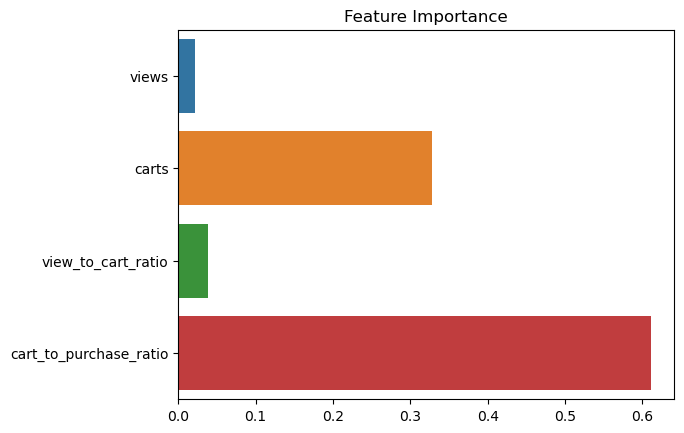

In [38]:
importances = model.feature_importances_
feature_names = X.columns
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance')
plt.show()

In [39]:
print("Recommendations:")
print("1. Target users with high view-to-cart ratios but low cart-to-purchase ratios with personalized offers.")
print("2. Encourage repeat purchases with loyalty rewards for frequent buyers.")
print("3. Re-engage churned users with email campaigns or discounts.")

Recommendations:
1. Target users with high view-to-cart ratios but low cart-to-purchase ratios with personalized offers.
2. Encourage repeat purchases with loyalty rewards for frequent buyers.
3. Re-engage churned users with email campaigns or discounts.
